<a href="https://colab.research.google.com/github/CristianCosci/pytorch-grad-cam/blob/grayscale_cam_tutorial/tutorials/prova_pull_request_gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone -b grayscale_cam_tutorial https://github.com/CristianCosci/pytorch-grad-cam.git
!pip install grad-cam

# **Get and use mask from grad-cam**
# A tutorial to learn how to get and reuse for other purpose the information returned by grad-cam project.
How can i use and apply a mask, based on information returned by grad-cam?

In this tutorial you will:
- Get an overview on logical operations.
- Learn how to get and reuse a mask returned by grad-cam system.
- See an example of grad-cam mask based application.

# 1. **Logical Operations**
First of all, if you want to get and use a mask you have to learn about **Logical Operations** (operation used to process selective portions of an image).

As you should know, images can be represented in two-dimensional arrays (*width x height*) and each two-dimensional array represents an **image channel**. <br>
For example:
- **RGB** has 3 channels $→$ ***red, green, blue***
- **BGR** the same, but in ***reverse order***
- **GRAYSCALE** has only one channel
- then there can be **other** formats in which there is a fourth channel called **ALPHA CHANNEL**

Each element in an array represents the **intensity value of each pixel** in the image, in the range [0-255]:
- the higher the value, the higher the intensity
- a value = 0 indicates that the pixel is off (it is black)

*For example, in a grayscale format image, a value of 255 indicates pure white.*

Pixel values can be represented in binary (therefore with a value of 0 or 1).

Logical operators perform operations on the latter in this way:
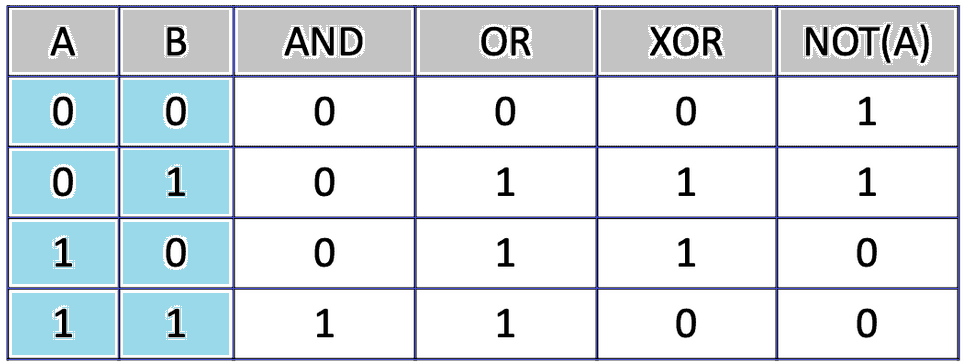

**You can use these operators using the cv2 library**.


In [ ]:
import cv2
import numpy as np
import matpltlib.pyplot as plt

import torch
from torchvision import models
from pytorch_grad_cam import GradCAM,HiResCAM, \
    ScoreCAM, \
    GradCAMPlusPlus, \
    AblationCAM, \
    XGradCAM, \
    EigenCAM, \
    EigenGradCAM, \
    LayerCAM, \
    FullGrad, \
    GradCAMElementWise
    

from pytorch_grad_cam import GuidedBackpropReLUModel
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# 2. **Bitwise Operations**

### **Function Syntax**

Example API for **`bitwise_and()`**. Others include: **`bitwise_not()`**, **`bitwise_or()`**, **`bitwise_xor()`** 

``` python
img = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```

`img`: Output array that has the same size and type as the input arrays.

The function has **2 required arguments**:

1. `src1`:	first input array or a scalar.
2. `src2`:	second input array or a scalar.

An important optional argument is:

1. `mask`:	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


### **For more explainaions see OpenCV Documentation**

[**`bitwise_and()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)
[**`bitwsie_not()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)
[**`bitwise_or()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gab85523db362a4e26ff0c703793a719b4)
[**`bitwise_xor()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga84b2d8188ce506593dcc3f8cd00e8e2c)

# 3. **Using bitwise operation on grad-cam project output**
Okay, now you should have the basics to understand what we're going to do.

First of all our goal is to perform grad-cam on an image of your choice in which we want to obtain the mask.

In questo esempio andrem ad utilizzare la seguente immagine

In [ ]:
from IPython.display import Image
Image(filename='TEST/generated_best_images/OG_vs_best_img0_65_54.png') 

Let's now run grad-cam on it.

In [ ]:
img = cv2.imread(, 1)

model = models.resnet50(pretrained=True)
target_layers = [model.layer4]

original_image = np.float32(X[image_id])
input_tensor = preprocess_image(original_image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

cam_algorithm = GradCAM

with cam_algorithm(model = model, target_layers = target_layers) as cam:
    cam.batch_size = 32
    grayscale_cam = cam(input_tensor=input_tensor, targets=None)

    # Here grayscale_cam has only one image in the batch
    grayscale_cam = grayscale_cam[0, :]
    

In [ ]:
mask = grayscale_cam * 255  #make range between 0-255

In [ ]:
retval, img_thresh = cv2.threshold(mask, 80, 255, cv2.THRESH_BINARY) #threshold alla maschera per filtrare la zona focale
mask = img_thresh.astype(np.uint8)

In [ ]:
img_applied_mask = cv2.bitwise_and(modified_image, modified_image, mask = mask)   #seziono l'immagine modificata con la maschera

In [ ]:
img_logo_mask_inv = cv2.bitwise_not(mask)
img_foreground = cv2.bitwise_and(original_image, original_image, mask = img_logo_mask_inv) *255
img_foreground = img_foreground.astype(np.uint8)

result = cv2.add(img_applied_mask, img_foreground[:, :, ::-1])